## 1. Data preparation

### 1.1. RNA-seq

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
from sklearn.cluster import KMeans
import csv
import gzip

In [2]:
import episcanpy.api as epi

In [3]:
RNA_seq = sc.read_mtx(
    'GSE126074_AdBrainCortex_SNAREseq_cDNA.counts.mtx.gz')

In [4]:
# col_names = pd.read_csv('GSE126074_AdBrainCortex_SNAREseq_cDNA.genes.tsv.gz', header = None)
# row_names = pd.read_csv('GSE126074_AdBrainCortex_SNAREseq_cDNA.barcodes.tsv.gz', header = None)

col_names = [row[0] for row in csv.reader(gzip.open('GSE126074_AdBrainCortex_SNAREseq_cDNA.genes.tsv.gz', mode="rt"), delimiter="\t")]
row_names = [row[0] for row in csv.reader(gzip.open('GSE126074_AdBrainCortex_SNAREseq_cDNA.barcodes.tsv.gz', mode="rt"), delimiter="\t")]

In [5]:
RNA_seq = RNA_seq.transpose()
RNA_seq.var.index = col_names
RNA_seq.obs.index = row_names

In [6]:
RNA_df = RNA_seq.to_df()
RNA_df

,0610005C13Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610030E20Rik,0610031O16Rik,0610037L13Rik,...,Vmn1r68,Vmn1r82,Vmn2r-ps23,Vmn2r-ps24,Vmn2r-ps45,Vmn2r-ps83,Vmn2r50,Vpreb2,n-R5s32,n-R5s50
09A_CAGCCCCGCCTT,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09A_CGCCTACCATGA,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09A_GATGCGCGGCTA,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09A_GGTCCGAGTCCT,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09A_TCTCCCGGCACC,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
09L_TACTAGTTCAAG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09L_ATGACGGGCCCC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09L_GAAACACCTCAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09L_AACGGTTTATCC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
RNA_seq.obs

""
09A_CAGCCCCGCCTT
09A_CGCCTACCATGA
09A_GATGCGCGGCTA
09A_GGTCCGAGTCCT
09A_TCTCCCGGCACC
...
09L_TACTAGTTCAAG
09L_ATGACGGGCCCC
09L_GAAACACCTCAT
09L_AACGGTTTATCC


In [8]:
RNA_seq.var

""
0610005C13Rik
0610007P14Rik
0610009B22Rik
0610009E02Rik
0610009L18Rik
...
Vmn2r-ps83
Vmn2r50
Vpreb2
n-R5s32


### 1.2. ATAC-seq

In [9]:
ATAC_seq = sc.read_mtx(
    'GSE126074_AdBrainCortex_SNAREseq_chromatin.counts.mtx.gz')

In [10]:
# rows_names = pd.read_csv('GSE126074_AdBrainCortex_SNAREseq_chromatin.barcodes.tsv.gz', header = None)
# cols_names = pd.read_csv('GSE126074_AdBrainCortex_SNAREseq_chromatin.peaks.tsv.gz', header = None)

cols_names = [row[0] for row in csv.reader(gzip.open('GSE126074_AdBrainCortex_SNAREseq_chromatin.barcodes.tsv.gz', mode="rt"), delimiter="\t")]
rows_names = [row[0] for row in csv.reader(gzip.open('GSE126074_AdBrainCortex_SNAREseq_chromatin.peaks.tsv.gz', mode="rt"), delimiter="\t")]


In [11]:
# ATAC_seq = ATAC_seq.transpose()
ATAC_seq.var.index = cols_names
ATAC_seq.obs.index = rows_names
ATAC_seq = ATAC_seq.transpose()
ATAC_df = ATAC_seq.to_df()
ATAC_df


,chr1:3005833-3005982,chr1:3094772-3095489,chr1:3119556-3120739,chr1:3121334-3121696,chr1:3134637-3135032,chr1:3164929-3165186,chr1:3167174-3167517,chr1:3181253-3181529,chr1:3204775-3205172,chr1:3210899-3211332,...,chrY:1286238-1286811,chrY:1299405-1299847,chrY:10640917-10641104,chrY:90719613-90719806,chrY:90726135-90726362,chrY:90732105-90732474,chrY:90740917-90741416,chrY:90741519-90742734,chrY:90742824-90743114,chrY:90744284-90744731
09A_GATGCGCGGCTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
09A_GCCATGACCCCA,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
09F_TGGACGATTTGT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
09K_GTCTGCCATTAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09F_GGATGAAGAGGG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
09F_AACCTCACTGAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09B_CACGTTAGCGCG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09L_ATGTCAGATATA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09L_AGTGGCCTCCTT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
ATAC_seq

AnnData object with n_obs × n_vars = 10309 × 244544

In [13]:
print(ATAC_seq.var_names)

Index(['chr1:3005833-3005982', 'chr1:3094772-3095489', 'chr1:3119556-3120739',
       'chr1:3121334-3121696', 'chr1:3134637-3135032', 'chr1:3164929-3165186',
       'chr1:3167174-3167517', 'chr1:3181253-3181529', 'chr1:3204775-3205172',
       'chr1:3210899-3211332',
       ...
       'chrY:1286238-1286811', 'chrY:1299405-1299847',
       'chrY:10640917-10641104', 'chrY:90719613-90719806',
       'chrY:90726135-90726362', 'chrY:90732105-90732474',
       'chrY:90740917-90741416', 'chrY:90741519-90742734',
       'chrY:90742824-90743114', 'chrY:90744284-90744731'],
      dtype='object', length=244544)


In [14]:
# remove any potential empty features or barcodes
epi.pp.filter_cells(ATAC_seq, min_features=200)
epi.pp.filter_features(ATAC_seq, min_cells=1)

In [15]:
ATAC_seq

AnnData object with n_obs × n_vars = 10309 × 244538
    obs: 'nb_features'
    var: 'n_cells'

In [16]:
ATAC_seq.obs['log_nb_features'] = [np.log10(x) for x in ATAC_seq.obs['nb_features']]
ATAC_seq

AnnData object with n_obs × n_vars = 10309 × 244538
    obs: 'nb_features', 'log_nb_features'
    var: 'n_cells'

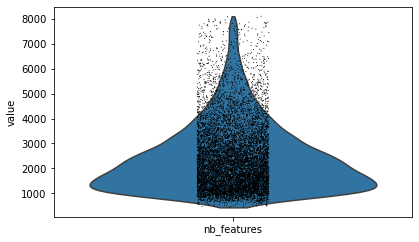

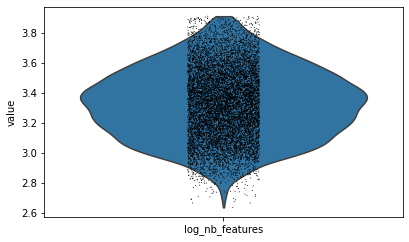

In [17]:
epi.pl.violin(ATAC_seq, ['nb_features'])
epi.pl.violin(ATAC_seq, ['log_nb_features'])

In [18]:
# # set a minimum number of cells to keep 
# min_features = 1000

# epi.pp.coverage_cells(ATAC_seq, binary=True, log=False, bins=50,
#                threshold=min_features, save='Buenrostro_bulk_peaks_coverage_cells.png')
# epi.pp.coverage_cells(ATAC_seq, binary=True, log=10, bins=50,
#                threshold=min_features, save='Buenrostro_bulk_peaks_coverage_cells_log10.png')

In [19]:
# # minimum number of cells sharing a feature
# min_cells = 5
# epi.pp.coverage_features(ATAC_seq, binary=True, log=False, 
#                         threshold=min_cells, save='Buenrostro_bulk_peaks_coverage_peaks.png')
# epi.pp.coverage_features(ATAC_seq, binary=True, log=True, 
#                         threshold=min_cells, save='Buenrostro_bulk_peaks_coverage_peaks_log10.png')

Actually proceed to filter the cells and peaks based on the QC plots

In [20]:
# min_features = 1000
# epi.pp.filter_cells(ATAC_seq, min_features=min_features)
# ATAC_seq

In [21]:
# min_cells = 5
# epi.pp.filter_features(ATAC_seq, min_cells=min_cells)
# ATAC_seq

Looking at the QC plots after filtering

In [22]:
# epi.pp.coverage_cells(ATAC_seq, binary=True, log='log10', bins=50, threshold=min_features)

In [23]:
# epi.pp.coverage_features(ATAC_seq, binary=True, log='log10', bins=50, threshold=min_cells)

Identifying the most variable features

We aim to select a cuttof after the elbow.

In [24]:
# epi.pp.cal_var(ATAC_seq)

In [25]:
# min_score_value = 0.515
# nb_feature_selected = 120000
# epi.pl.variability_features(ATAC_seq,log=None,
#                      min_score=min_score_value, nb_features=nb_feature_selected,
#                      save='variability_features_plot_bonemarrow_peakmatrix.png')

# epi.pl.variability_features(ATAC_seq,log='log10',
#                      min_score=min_score_value, nb_features=nb_feature_selected,
#                      save='variability_features_plot_bonemarrow_peakmatrix_log10.png')

In [26]:
# save the current matrix in the raw layer
ATAC_seq.raw = ATAC_seq

In [27]:
# create a new AnnData containing only the most variable features
# ATAC_seq = epi.pp.select_var_feature(ATAC_seq,
#                                   nb_features=nb_feature_selected,
#                                   show=False,
#                                   copy=True)

In [28]:
# ATAC_seq

In [29]:
# epi.pl.violin(ATAC_seq, ['nb_features'])
# epi.pl.violin(ATAC_seq, ['log_nb_features'])

In [30]:
ATAC_seq

AnnData object with n_obs × n_vars = 10309 × 244538
    obs: 'nb_features', 'log_nb_features'
    var: 'n_cells'

In [31]:
# epi.pp.filter_cells(ATAC_seq, min_features=2000)
# epi.pp.filter_cells(ATAC_seq, max_features=25000)

In [32]:
ATAC_seq

AnnData object with n_obs × n_vars = 10309 × 244538
    obs: 'nb_features', 'log_nb_features'
    var: 'n_cells'

In [33]:
# epi.pl.violin(ATAC_seq, ['nb_features'])
# epi.pl.violin(ATAC_seq, ['log_nb_features'])

## 2.  Dimension reduction

### 2.1. PCA (RNA-seq)

Show those genes that yield the highest fraction of counts in each single cell, across all cells.

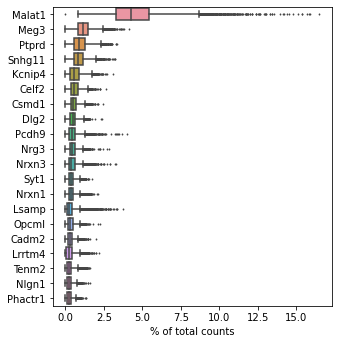

In [34]:
sc.pl.highest_expr_genes(RNA_seq, n_top=20, )

In [35]:
sc.pp.filter_cells(RNA_seq, min_genes=20)

In [36]:
sc.pp.filter_genes(RNA_seq, min_cells=5)

In [37]:
RNA_seq.obs

,n_genes
09A_CAGCCCCGCCTT,2350
09A_CGCCTACCATGA,2351
09A_GATGCGCGGCTA,2495
09A_GGTCCGAGTCCT,2340
09A_TCTCCCGGCACC,2159
...,...
09L_TACTAGTTCAAG,251
09L_ATGACGGGCCCC,343
09L_GAAACACCTCAT,256
09L_AACGGTTTATCC,355


In [38]:
RNA_seq.var

,n_cells
0610005C13Rik,15
0610007P14Rik,355
0610009B22Rik,145
0610009E02Rik,140
0610009L18Rik,148
...,...
Skint1,7
E330011M16Rik,6
Gm11854,5
Ccr3,5


In [39]:
RNA_seq.var['mt'] = RNA_seq.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(RNA_seq, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [40]:
RNA_seq.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
09A_CAGCCCCGCCTT,2350,2339,4611.0,0.0,0.0
09A_CGCCTACCATGA,2351,2347,4779.0,0.0,0.0
09A_GATGCGCGGCTA,2495,2493,4866.0,0.0,0.0
09A_GGTCCGAGTCCT,2340,2337,4662.0,0.0,0.0
09A_TCTCCCGGCACC,2159,2155,4335.0,0.0,0.0
...,...,...,...,...,...
09L_TACTAGTTCAAG,251,251,290.0,0.0,0.0
09L_ATGACGGGCCCC,343,342,507.0,0.0,0.0
09L_GAAACACCTCAT,256,256,320.0,0.0,0.0
09L_AACGGTTTATCC,355,355,436.0,0.0,0.0


In [41]:
RNA_seq.var

,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
0610005C13Rik,15,False,15,0.001455,99.854496,15.0
0610007P14Rik,355,False,355,0.038219,96.556407,394.0
0610009B22Rik,145,False,145,0.016199,98.593462,167.0
0610009E02Rik,140,False,140,0.014744,98.641963,152.0
0610009L18Rik,148,False,148,0.016102,98.564361,166.0
...,...,...,...,...,...,...
Skint1,7,False,7,0.000679,99.932098,7.0
E330011M16Rik,6,False,6,0.000582,99.941798,6.0
Gm11854,5,False,5,0.000485,99.951499,5.0
Ccr3,5,False,5,0.000582,99.951499,6.0


A violin plot of some of the computed quality measures:

the number of genes expressed in the count matrix

the total counts per cell

the percentage of counts in mitochondrial genes

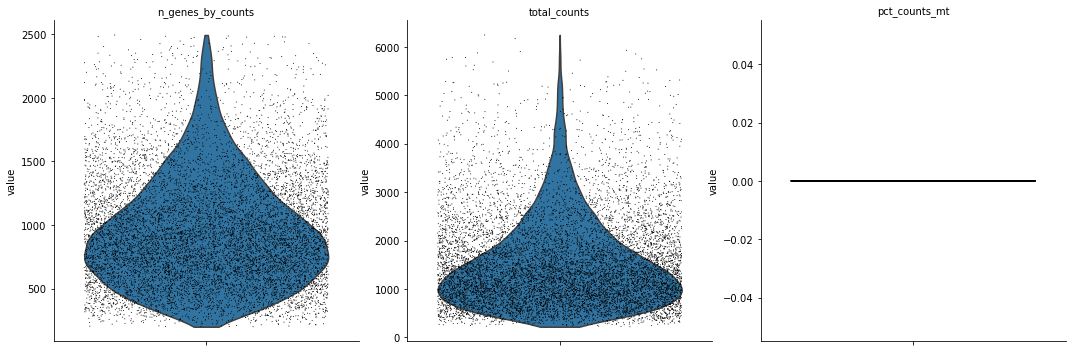

In [42]:
sc.pl.violin(RNA_seq, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

Remove cells that have too many mitochondrial genes expressed or too many total counts:

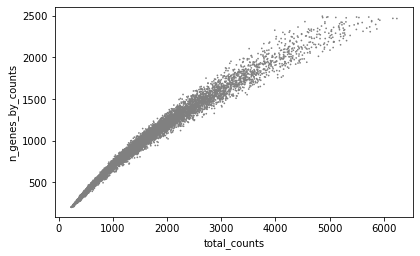

In [43]:
sc.pl.scatter(RNA_seq, x='total_counts', y='n_genes_by_counts')

Actually do the filtering by slicing the AnnData object.

In [44]:
RNA_seq = RNA_seq[RNA_seq.obs.n_genes_by_counts < 2500, :]

Total-count normalize (library-size correct) the data matrix  𝐗  to 10,000 reads per cell, so that counts become comparable among cells.

In [45]:
sc.pp.normalize_total(RNA_seq, target_sum=1e4)

Logarithmize the data:

In [46]:
sc.pp.log1p(RNA_seq)

Identify highly-variable genes.

In [47]:
sc.pp.highly_variable_genes(RNA_seq, min_mean=0.0125, max_mean=3, min_disp=0.5)

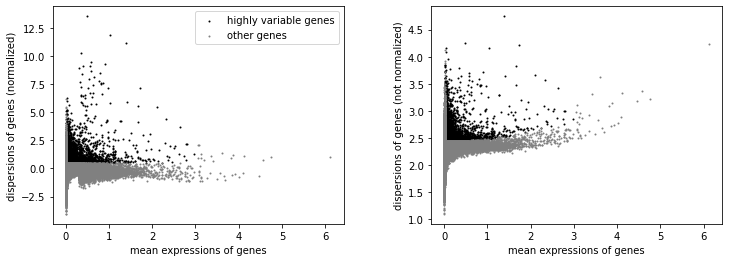

In [48]:
sc.pl.highly_variable_genes(RNA_seq)

Set the .raw attribute of the AnnData object to the normalized and logarithmized raw gene expression for later use in differential testing and visualizations of gene expression. This simply freezes the state of the AnnData object.

Note

You can get back an AnnData of the object in .raw by calling .raw.to_adata()

In [49]:
RNA_seq.raw = RNA_seq

Note

If you don't proceed below with correcting the data with sc.pp.regress_out and scaling it via sc.pp.scale, you can also get away without using .raw at all.

The result of the previous highly-variable-genes detection is stored as an annotation in .var.highly_variable and auto-detected by PCA and hence, sc.pp.neighbors and subsequent manifold/graph tools. In that case, the step actually do the filtering below is unnecessary, too.

Actually do the filtering

In [50]:
RNA_seq = RNA_seq[:, RNA_seq.var.highly_variable]

Regress out effects of total counts per cell. Scale the data to unit variance.

In [51]:
sc.pp.regress_out(RNA_seq, ['total_counts'])

Scale each gene to unit variance. Clip values exceeding standard deviation 10.

In [52]:
sc.pp.scale(RNA_seq, max_value=10)

Now apply PCA:

Reduce the dimensionality of the data by running principal component analysis (PCA), which reveals the main axes of variation and denoises the data.

In [53]:
sc.tl.pca(RNA_seq, svd_solver='arpack')

We can make a scatter plot in the PCA coordinates, but we will not use that later on.

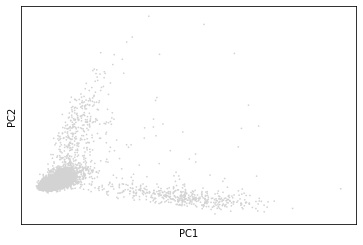

In [54]:
sc.pl.pca(RNA_seq)

Let us inspect the contribution of single PCs to the total variance in the data. This gives us information about how many PCs we should consider in order to compute the neighborhood relations of cells, e.g. used in the clustering function sc.tl.louvain() or tSNE sc.tl.tsne(). In our experience, often a rough estimate of the number of PCs does fine.

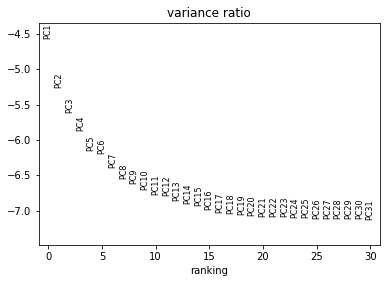

In [55]:
sc.pl.pca_variance_ratio(RNA_seq, log=True)

In [56]:
RNA_seq

AnnData object with n_obs × n_vars = 10309 × 3928
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

### 2.2. NMF (ATAC-seq)

In [57]:
ATAC_seq.obs.index

Index(['09A_GATGCGCGGCTA', '09A_GCCATGACCCCA', '09F_TGGACGATTTGT',
       '09K_GTCTGCCATTAC', '09F_GGATGAAGAGGG', '09C_AGCCCGCCATGG',
       '09A_GCCTTCTTCCGT', '09F_GTAAAGCCAACA', '09D_TCCAGGCACGGA',
       '09A_GTAGGAAGCCAC',
       ...
       '09I_ATTCCCCCGTAA', '09G_CGAACCTCGCCC', '09I_AATGTAATCCTC',
       '09G_TCAATATAGGAA', '09A_GCAGTTCGCGGC', '09F_AACCTCACTGAC',
       '09B_CACGTTAGCGCG', '09L_ATGTCAGATATA', '09L_AGTGGCCTCCTT',
       '09L_AGTCGGAACTCT'],
      dtype='object', length=10309)

In [58]:
from sklearn.decomposition import NMF
ATAC_seqn = ATAC_seq.X.tocsr()

model = NMF(n_components=10)
components = model.fit_transform(ATAC_seqn)
components = pd.DataFrame(components)
components.index = ATAC_seq.obs.index
components= components.rename(columns = {components.columns[0]:'C1', components.columns[1]:'C2', components.columns[2]:'C3', components.columns[3]:'C4', components.columns[4]:'C5', components.columns[5]:'C6', components.columns[6]:'C7', components.columns[7]:'C8', components.columns[8]:'C9', components.columns[9]:'C10'})      
components.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
09A_GATGCGCGGCTA,0.532487,0.088719,0.000000,0.138699,0.430401,0.031114,0.444988,0.060987,0.261423,0.346840
09A_GCCATGACCCCA,0.655949,0.041799,0.297210,0.814623,0.185465,0.094282,0.000000,0.131968,0.236631,0.217004
09F_TGGACGATTTGT,0.763317,0.000000,0.393020,0.391949,0.000000,0.037362,0.000000,1.336706,0.000000,0.078493
09K_GTCTGCCATTAC,0.225869,0.602428,0.314212,0.078158,0.051696,0.000000,0.265392,0.094145,0.269973,0.120811
09F_GGATGAAGAGGG,0.594615,0.025981,0.325101,0.200888,0.118557,0.284505,0.000000,0.176964,0.000000,0.075395


In [59]:
NMFATAC_seq = sc.AnnData(components)

### 2.3. LDA (ATAC-seq)

In [60]:
ATAC_seql = ATAC_seq.X.tocsr()
ATAC_seql

<10309x244538 sparse matrix of type '<class 'numpy.float32'>'
	with 25461864 stored elements in Compressed Sparse Row format>

In [62]:
import gc
gc.collect()

77

In [63]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation( n_components = 10, n_jobs= -1)
lda_components = lda_model.fit_transform(ATAC_seql)
lda_components.shape

(10309, 10)

In [64]:
lda_components = pd.DataFrame(lda_components)
lda_components.index = ATAC_seq.obs.index
lda_components = lda_components.rename(columns = {lda_components.columns[0]:'LDA_C1', lda_components.columns[1]:'LDA_C2', lda_components.columns[2]:'LDA_C3', lda_components.columns[3]:'LDA_C4', lda_components.columns[4]:'LDA_C5', lda_components.columns[5]:'LDA_C6', lda_components.columns[6]:'LDA_C7', lda_components.columns[7]:'LDA_C8', lda_components.columns[8]:'LDA_C9', lda_components.columns[9]:'LDA_C10'})      
lda_components.head()

,LDA_C1,LDA_C2,LDA_C3,LDA_C4,LDA_C5,LDA_C6,LDA_C7,LDA_C8,LDA_C9,LDA_C10
09A_GATGCGCGGCTA,0.340102,0.027443,0.000014,0.389562,0.000014,0.160105,0.004937,0.073939,0.000014,0.003869
09A_GCCATGACCCCA,0.242680,0.207164,0.000014,0.301480,0.000014,0.047239,0.004298,0.197082,0.000014,0.000014
09F_TGGACGATTTGT,0.340054,0.152487,0.000014,0.371294,0.000014,0.017949,0.000014,0.118144,0.000014,0.000014
09K_GTCTGCCATTAC,0.116253,0.000016,0.000016,0.156067,0.000016,0.565380,0.101007,0.061211,0.000016,0.000016
09F_GGATGAAGAGGG,0.300330,0.014898,0.000020,0.544350,0.000020,0.004082,0.001077,0.135181,0.000020,0.000020


In [65]:
LDAATAC_seq = sc.AnnData(lda_components)

## 3.Clustring and 4.Visualization

### 3.1. Clustering the raw scRNA-seq data and the one after dimension reduction (the result in 2.1) and 4.1

leiden: raw data

In [66]:
sc.pp.neighbors(RNA_seq, n_neighbors=10)

In [67]:
sc.tl.umap(RNA_seq)

In [68]:
sc.tl.leiden(RNA_seq)

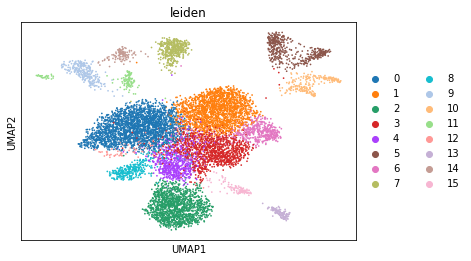

In [69]:
sc.pl.umap(RNA_seq, color=['leiden'])

In [70]:
RNA_seq

AnnData object with n_obs × n_vars = 10309 × 3928
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

kmeans: with PCA

... storing 'kmeans16' as categorical


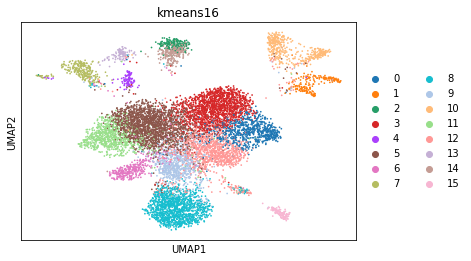

In [71]:
from sklearn.cluster import KMeans
X_pca = RNA_seq.obsm['X_pca']
PCA_kmeans = KMeans(n_clusters = 16, random_state = 0).fit(X_pca)
RNA_seq.obs['kmeans16'] = PCA_kmeans.labels_.astype(str)
sc.pl.umap(RNA_seq, color = ['kmeans16'])

leiden: with PCA

In [72]:
sc.pp.neighbors(RNA_seq, n_neighbors=10, n_pcs=10)

In [73]:
sc.tl.umap(RNA_seq)

In [74]:
sc.tl.leiden(RNA_seq)

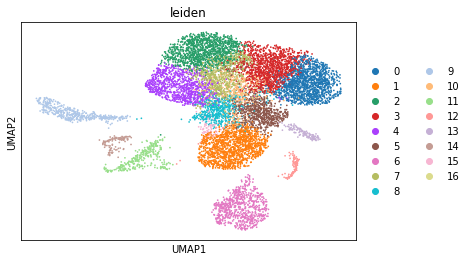

In [75]:
sc.pl.umap(RNA_seq, color=['leiden'])

### 3.2. Clustering the raw scATAC-seq data and the one after dimension reduction and 4.2. 

Kmeans:raw data

In [76]:
# from sklearn.cluster import KMeans
# rawATAC_kmeans = KMeans(n_clusters = 16, random_state = 0).fit(ATAC_seq)
# NMFATAC_seq.obs['kmeans16'] = NMF_kmeans.labels_.astype(str)
# sc.pl.umap(NMFATAC_seq, color = ['kmeans16'])

leiden:raw data

In [77]:
sc.pp.neighbors(ATAC_seq, n_neighbors=10)

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [78]:
sc.tl.umap(ATAC_seq)

In [79]:
sc.tl.leiden(ATAC_seq)

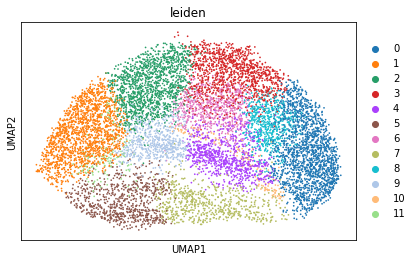

In [80]:
sc.pl.umap(ATAC_seq, color=['leiden'])

KMeans: NMF

In [81]:
sc.pp.neighbors(NMFATAC_seq, n_neighbors=10)
sc.tl.umap(NMFATAC_seq)

... storing 'kmeans16' as categorical


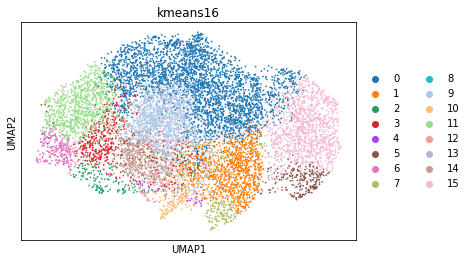

In [82]:
from sklearn.cluster import KMeans
NMF_kmeans = KMeans(n_clusters = 16, random_state = 0).fit(components)
NMFATAC_seq.obs['kmeans16'] = NMF_kmeans.labels_.astype(str)
sc.pl.umap(NMFATAC_seq, color = ['kmeans16'])


leiden: NMF

In [83]:
sc.pp.neighbors(NMFATAC_seq, n_neighbors=10)

In [84]:
sc.tl.umap(NMFATAC_seq)

In [85]:
sc.tl.leiden(NMFATAC_seq)

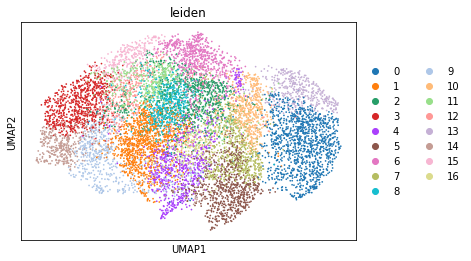

In [86]:
sc.pl.umap(NMFATAC_seq, color=['leiden'])

### 3.3. Clustering the scATAC-seq data after dimension reduction and 4.2.

Kmeans: LDA

In [87]:
sc.pp.neighbors(LDAATAC_seq, n_neighbors=10)
sc.tl.umap(LDAATAC_seq)

... storing 'kmeans16' as categorical


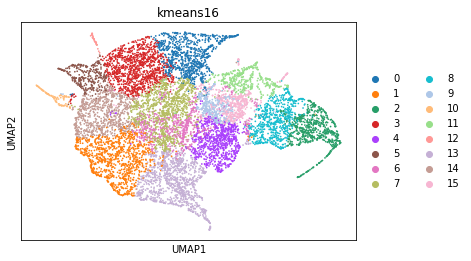

In [88]:
lda_kmeans = KMeans(n_clusters = 16, random_state = 0).fit(lda_components)
LDAATAC_seq.obs['kmeans16'] = lda_kmeans.labels_.astype(str)
sc.pl.umap(LDAATAC_seq, color = ['kmeans16'])

leidan: LDA

In [89]:
sc.pp.neighbors(LDAATAC_seq, n_neighbors=10)

In [90]:
sc.tl.umap(LDAATAC_seq)

In [91]:
sc.tl.leiden(LDAATAC_seq)

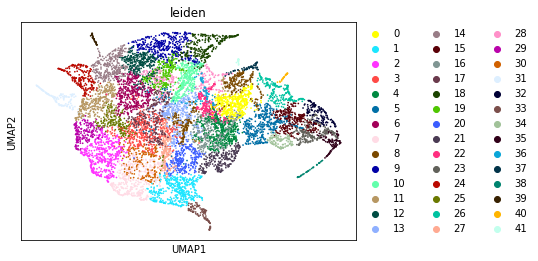

In [92]:
sc.pl.umap(LDAATAC_seq, color=['leiden'])

In [93]:
LDAATAC_seq.obs

,kmeans16,leiden
09A_GATGCGCGGCTA,8,5
09A_GCCATGACCCCA,15,5
09F_TGGACGATTTGT,8,5
09K_GTCTGCCATTAC,0,19
09F_GGATGAAGAGGG,6,5
...,...,...
09F_AACCTCACTGAC,1,30
09B_CACGTTAGCGCG,14,25
09L_ATGTCAGATATA,3,14
09L_AGTGGCCTCCTT,2,15


## 5. Evaluation

PCA vs NMF

In [112]:
# dice coeff PCA vs NMF
pca = RNA_seq.obs['kmeans16'].values.astype('int')
nmf = NMFATAC_seq.obs['kmeans16'].values.astype('int')
df_pcanmf = pd.DataFrame(columns = [str(i) for i in range(16)])

for i in range(16):
    pcanmf = []
    pcac = pca == i
    for j in range(16):
        nmfc = nmf == j 
        val = (np.sum((pcac)*(nmfc))*2.0)/( np.sum(pcac) + np.sum(nmfc))
        pcanmf += [val]
    df_pcanmf = df_pcanmf.append({'0': pcanmf[0], '1': pcanmf[1], '2': pcanmf[2], '3': pcanmf[3], '4': pcanmf[4], '5': pcanmf[5], '6': pcanmf[6], '7': pcanmf[7], '8': pcanmf[8], '9': pcanmf[9], '10': pcanmf[10], '11': pcanmf[11], '12': pcanmf[12], '13': pcanmf[13], '14': pcanmf[14], '15': pcanmf[15]}, ignore_index = True)
df_pcanmf.index = df_pcanmf.columns    
df_pcanmf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.109987,0.083244,0.013304,0.074355,0.002513,0.032946,0.044061,0.034483,0.000000,0.109304,0.029443,0.090960,0.007143,0.036538,0.068690,0.085360
1,0.038989,0.023041,0.024242,0.029491,0.000000,0.021739,0.021186,0.011236,0.000000,0.038977,0.021108,0.029777,0.022388,0.004274,0.032353,0.030492
2,0.025775,0.042254,0.045752,0.008310,0.010000,0.032110,0.040179,0.006024,0.000000,0.029666,0.000000,0.018565,0.024590,0.013514,0.012195,0.043693
3,0.184794,0.142750,0.021302,0.087369,0.002525,0.040659,0.041485,0.025641,0.000000,0.143904,0.018401,0.119112,0.012285,0.052516,0.074510,0.149839
4,0.025063,0.019818,0.008368,0.009160,0.015038,0.016260,0.020997,0.015094,0.000000,0.016763,0.006944,0.016100,0.011299,0.005305,0.010187,0.017751
5,0.236546,0.135834,0.020755,0.078076,0.007944,0.042667,0.045977,0.028891,0.000000,0.167249,0.041494,0.127376,0.011662,0.042516,0.076923,0.147850
6,0.053742,0.043243,0.027559,0.047619,0.009950,0.028213,0.024615,0.026217,0.000000,0.065934,0.053860,0.056236,0.017937,0.040248,0.041958,0.056755
7,0.048488,0.022059,0.005155,0.034826,0.007092,0.038610,0.045283,0.014493,0.000000,0.031765,0.004577,0.034728,0.024540,0.038023,0.035230,0.054630
8,0.178182,0.116577,0.031790,0.082662,0.004474,0.039315,0.036501,0.028513,0.000000,0.139181,0.024064,0.116939,0.010108,0.056782,0.069004,0.107031
9,0.117399,0.091309,0.014184,0.041204,0.008108,0.043033,0.040486,0.018349,0.000000,0.097312,0.026816,0.090435,0.010204,0.020325,0.046823,0.087800


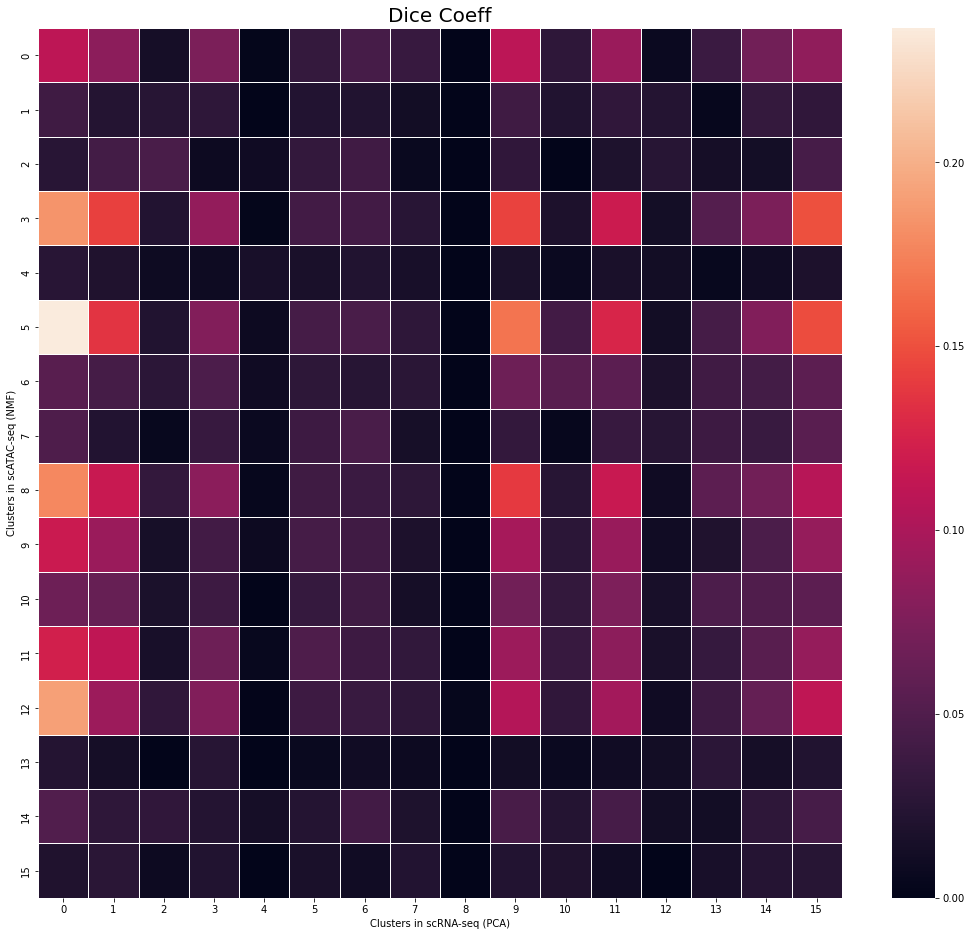

In [115]:
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig = figure(figsize=(18, 16))
df_pcanmf.columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
df_pcanmf.index = df_pcanmf.columns
sb.heatmap(df_pcanmf, linewidth=0.5)
plt.title('Dice Coeff', fontsize = 20) 
plt.xlabel('Clusters in scRNA-seq (PCA)')
plt.ylabel('Clusters in scATAC-seq (NMF)') 
plt.show()

In [116]:
# dice coeff PCA vs LDA
pca = RNA_seq.obs['kmeans16'].values.astype('int')
lda = LDAATAC_seq.obs['kmeans16'].values.astype('int')
df_pcalda = pd.DataFrame(columns = [str(i) for i in range(16)])
for i in range(16):
    pcalda = []
    pcac = pca == i
    for j in range(16):
        ldac = lda == j 
        val = (np.sum((pcac)*(ldac))*2.0)/(np.sum(pcac) + np.sum(ldac) )
        pcalda += [val]
    df_pcalda = df_pcalda.append({'0': pcalda[0], '1': pcalda[1], '2': pcalda[2], '3': pcalda[3], '4': pcalda[4], '5': pcalda[5], '6': pcalda[6], '7': pcalda[7], '8': pcalda[8], '9': pcalda[9], '10': pcalda[10], '11': pcalda[11], '12': pcalda[12], '13': pcalda[13], '14': pcalda[14], '15': pcalda[15]}, ignore_index = True)
df_pcalda.index = df_pcalda.columns    
df_pcalda

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.079559,0.087550,0.055749,0.097321,0.071879,0.046083,0.060649,0.090150,0.067653,0.045375,0.018519,0.056555,0.009913,0.078261,0.079169,0.062208
1,0.030132,0.038753,0.030127,0.038186,0.031558,0.031189,0.028369,0.034286,0.023613,0.024390,0.020548,0.020168,0.000000,0.029968,0.028896,0.014006
2,0.025048,0.024076,0.050060,0.024331,0.026263,0.028630,0.026764,0.024979,0.038882,0.014545,0.022388,0.017513,0.000000,0.027331,0.014815,0.034783
3,0.110652,0.102866,0.089969,0.116928,0.102780,0.049119,0.091568,0.136170,0.099683,0.057911,0.014528,0.063427,0.007524,0.117960,0.097896,0.076181
4,0.010299,0.010949,0.020725,0.010292,0.017335,0.033175,0.013245,0.021164,0.018519,0.012422,0.019900,0.015873,0.000000,0.027188,0.018223,0.028892
5,0.127630,0.130333,0.085187,0.133246,0.122682,0.049501,0.088012,0.127363,0.095563,0.071066,0.009606,0.070440,0.005926,0.145847,0.094962,0.075080
6,0.048387,0.060073,0.048031,0.061324,0.036913,0.031838,0.042969,0.051319,0.048780,0.047872,0.025532,0.033635,0.009685,0.053942,0.050567,0.026906
7,0.042857,0.041767,0.039088,0.041065,0.041045,0.017513,0.050885,0.028059,0.061878,0.025316,0.005714,0.027565,0.000000,0.022624,0.038948,0.028497
8,0.085360,0.122396,0.081818,0.117944,0.098545,0.057669,0.079470,0.109308,0.064155,0.049675,0.021292,0.066589,0.013314,0.123270,0.106424,0.062261
9,0.072243,0.057546,0.056563,0.090243,0.061438,0.036929,0.088106,0.066628,0.080704,0.047706,0.022277,0.037804,0.002663,0.102018,0.087542,0.058537


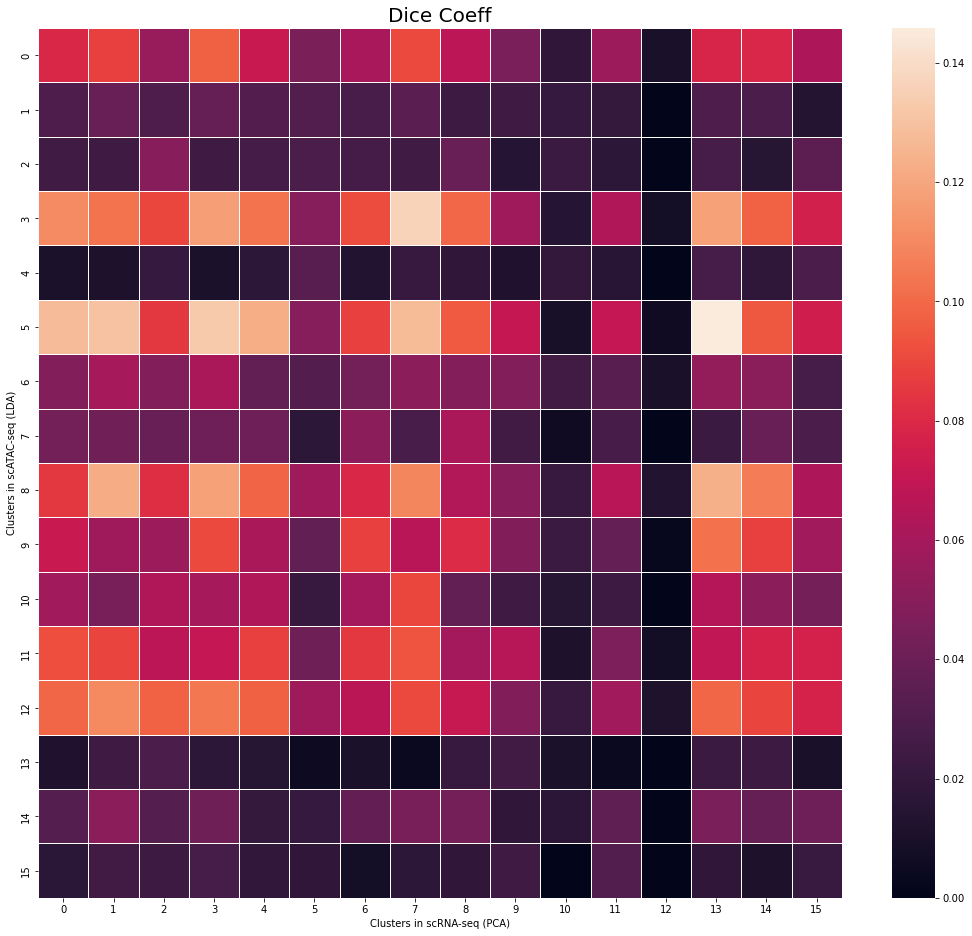

In [117]:
fig = figure(figsize=(18, 16))
df_pcanmf.columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
df_pcalda.index = df_pcalda.columns
sns.heatmap(df_pcalda, linewidth=0.5)
plt.title('Dice Coeff', fontsize = 20) 
plt.xlabel('Clusters in scRNA-seq (PCA)')
plt.ylabel('Clusters in scATAC-seq (LDA)') 
plt.show()